In [1]:
#!pip install scikit-learn
#!pip install pytesseract
#!pip install tesseract
#!pip install tesseract-ocr this command deosnt weork

#So install tesseract-ocr using apt install

In [6]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob

import math

import pytesseract

In [39]:
def get_image_formats(img):

    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(img, alpha=(255.0))

    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    
    return plate_image, gray, blur, binary, dilate

In [40]:
def plot_allimages(allimage_types, allimage_titles, string_flag = True):
    tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"

    
    for img_cnt, img in enumerate(allimage_types):
        plt.subplot(2,3,img_cnt+1)
        plt.imshow(img, cmap="gray")
        
        if (string_flag ==True):
            out = pytesseract.image_to_string(img, config=tess_config, lang="eng")
        else:
            out =''
            
        plt.title(allimage_titles[img_cnt] + ' : ' + out, fontsize = 20)
            

    plt.show()
        #print(f'Image: {out}')   

In [41]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
def enhance(input_img):
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(input_img)
    #plt.imshow('l_channel', l)
    #cv2.imshow('a_channel', a)
    #cv2.imshow('b_channel', b)

    #-----Applying CLAHE to L-channel-------------------------------------------
    
    cl = clahe.apply(l)
    #cv2.imshow('CLAHE output', cl)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #cv2.imshow('limg', limg)

    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    #cv2.imshow('final', final)
    
    return final

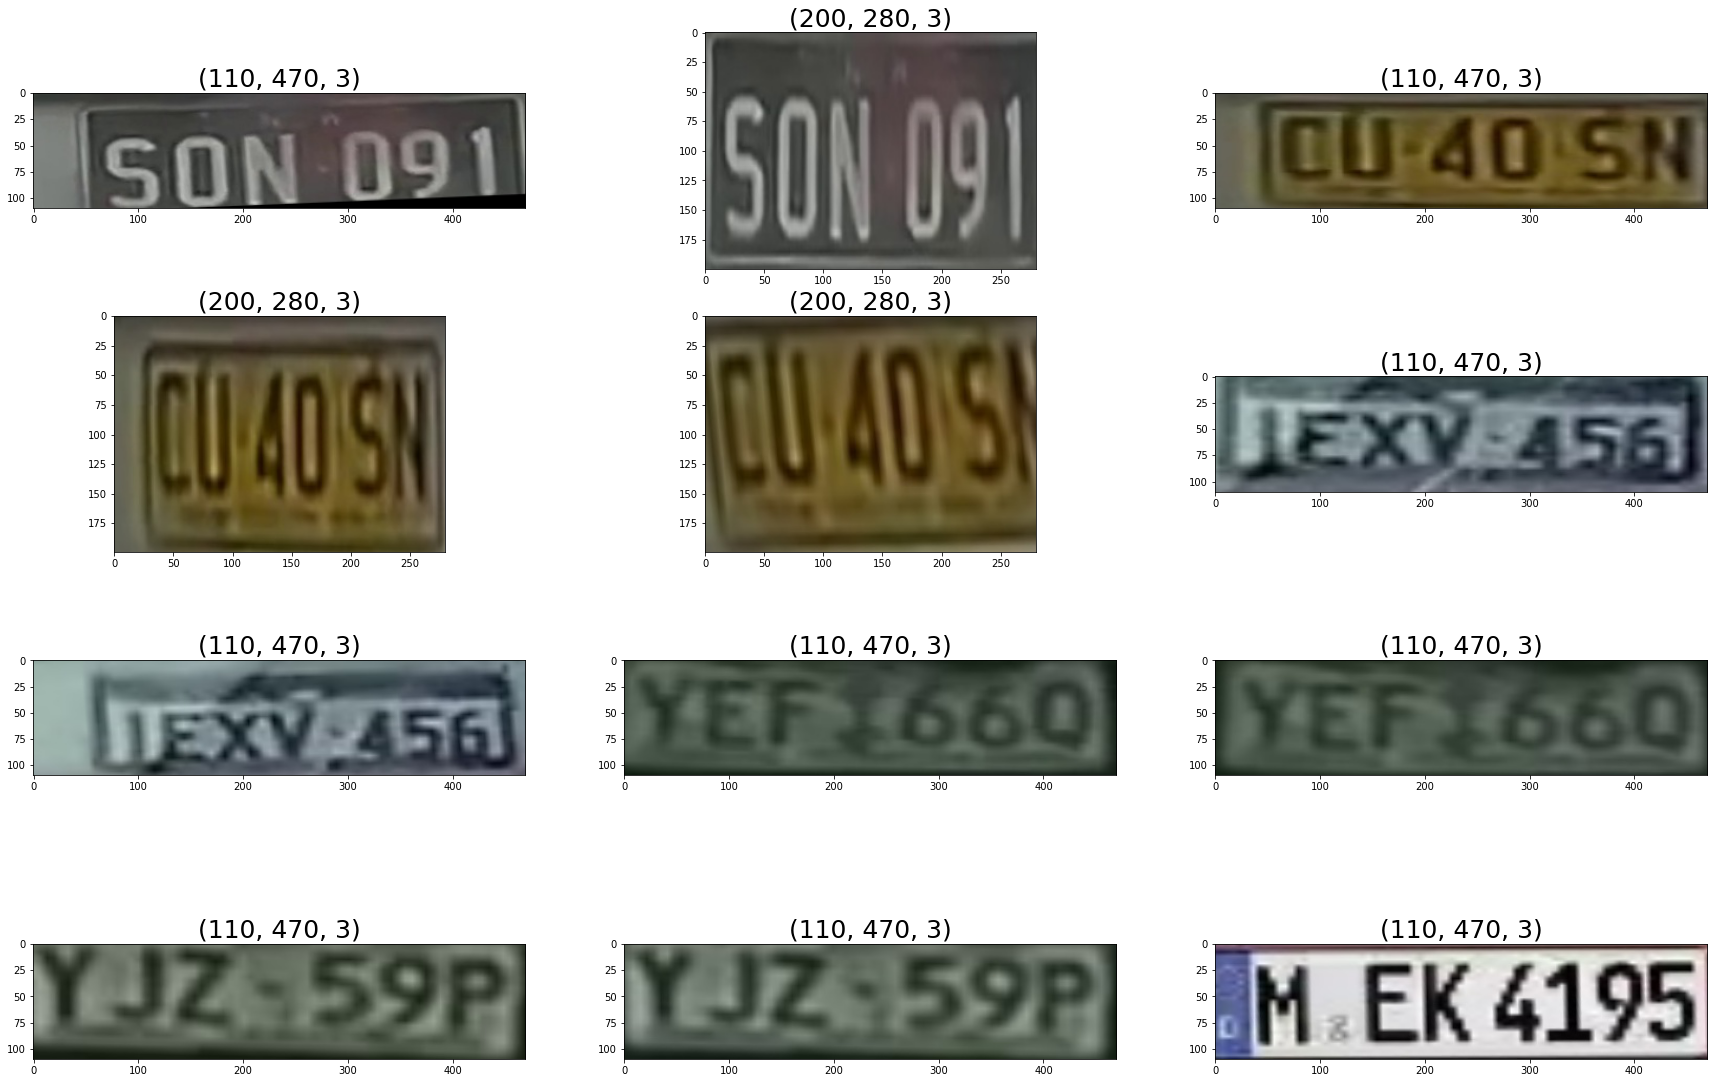

In [42]:
fnames = glob.glob('plate_samples/*.jpg')
fnames.sort()
#print(fnames)

cols = 3
rows = math.ceil(len(fnames)/cols)

plt.figure(figsize=(30,rows*5))
for fcnt, f in enumerate(fnames):
    img = plt.imread(f)
    plt.subplot(rows,cols,fcnt+1)    
    plt.imshow(img)
    title = str(img.shape)
    plt.title(title, fontsize=25 )

# Original Images

Original images : (110, 470, 3)


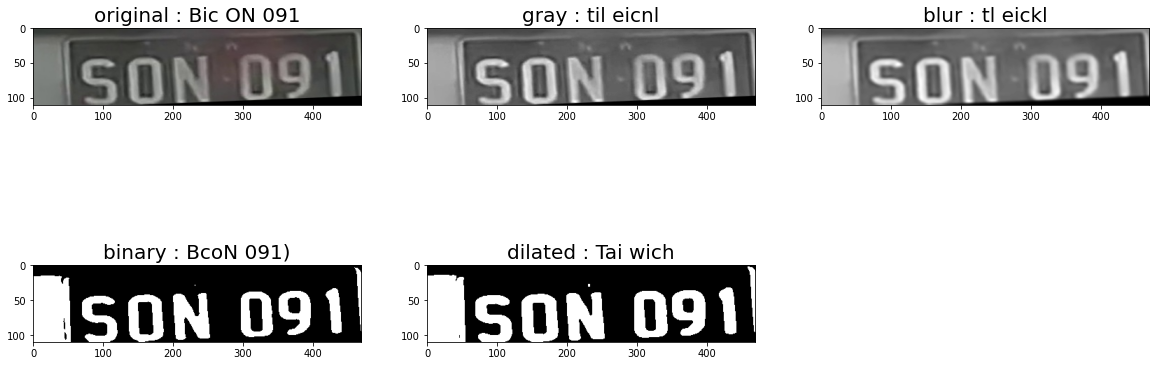

********************************
Enhanced images : (110, 470, 3)


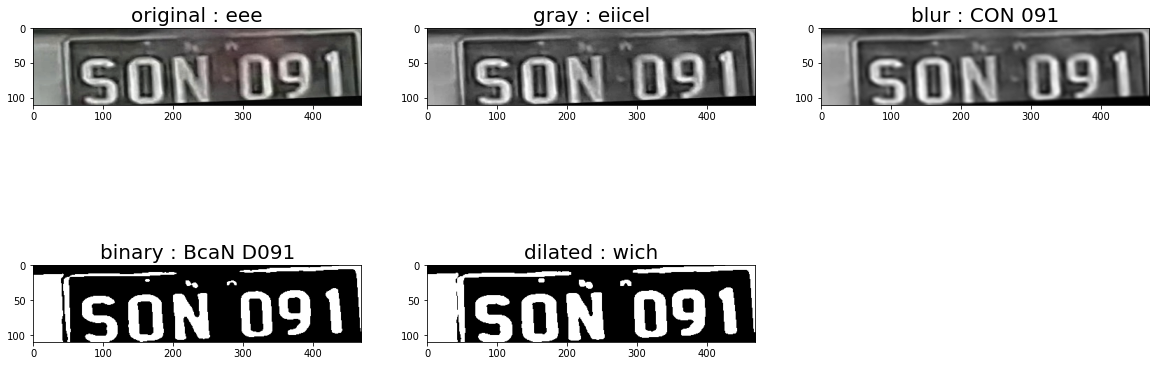

*************************************************************************
Original images : (200, 280, 3)


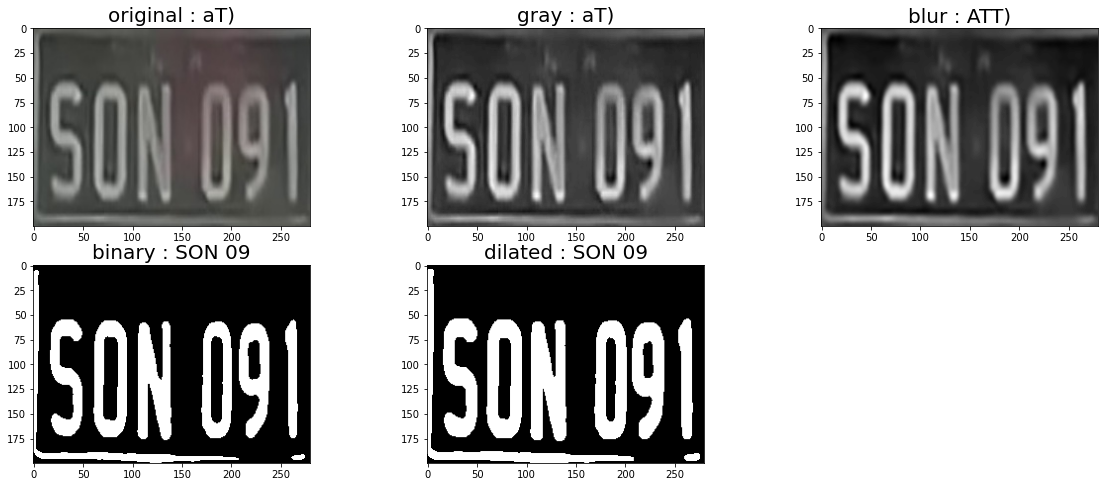

********************************
Enhanced images : (200, 280, 3)


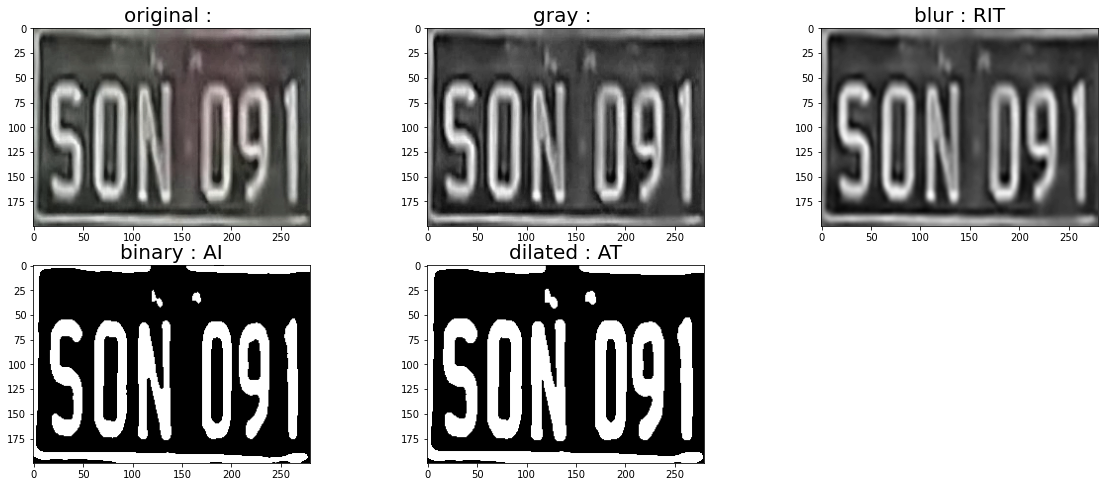

*************************************************************************
Original images : (110, 470, 3)


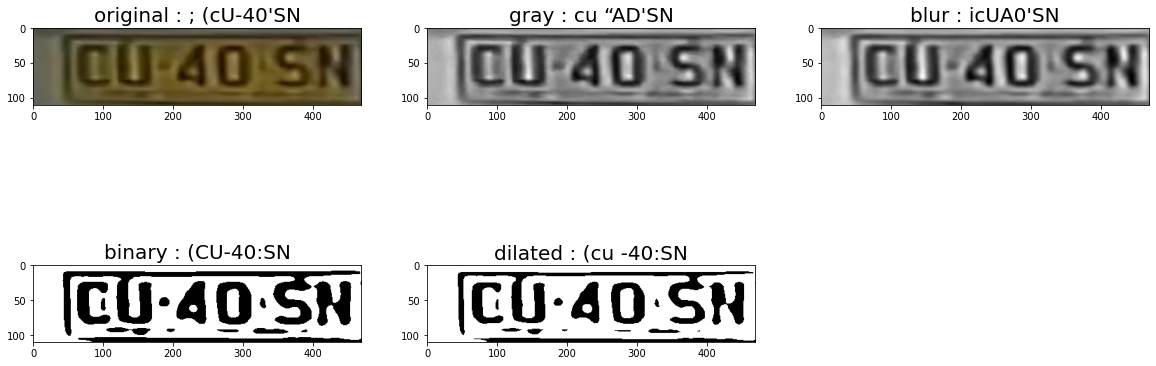

********************************
Enhanced images : (110, 470, 3)


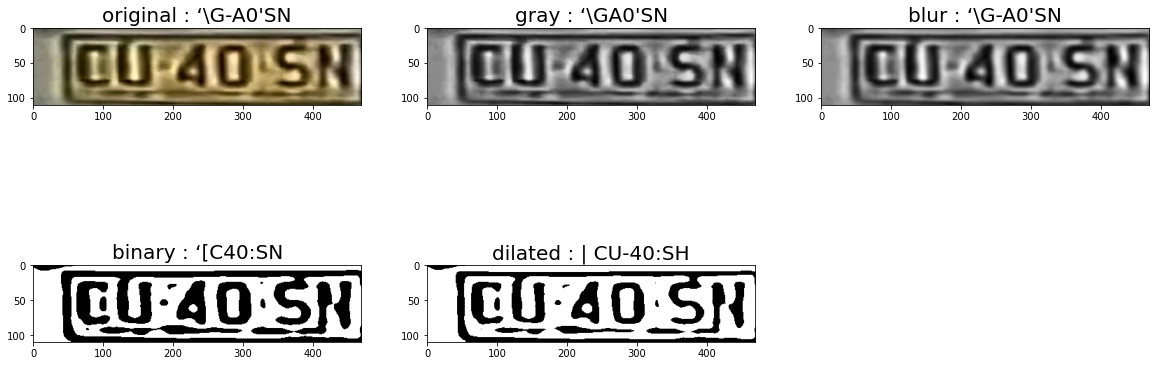

*************************************************************************
Original images : (200, 280, 3)


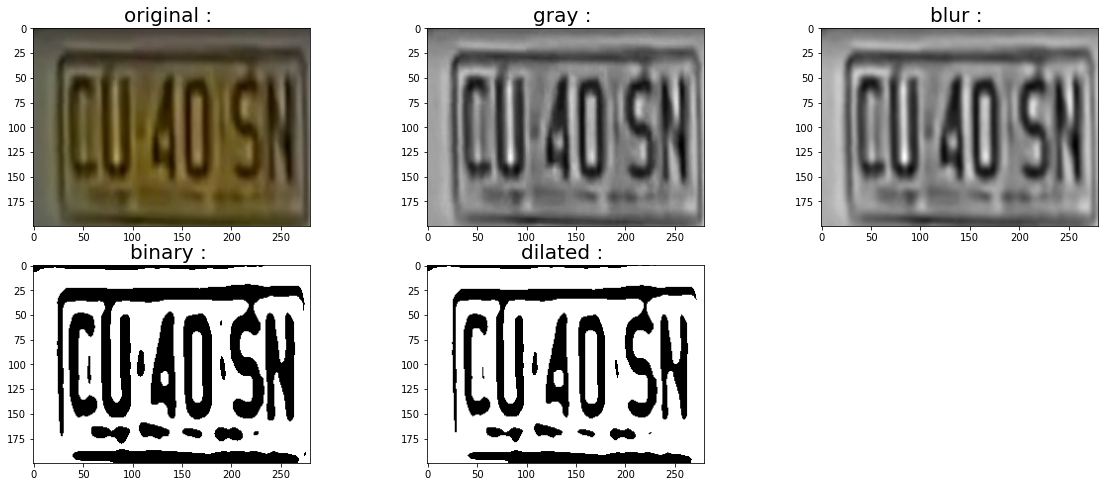

********************************
Enhanced images : (200, 280, 3)


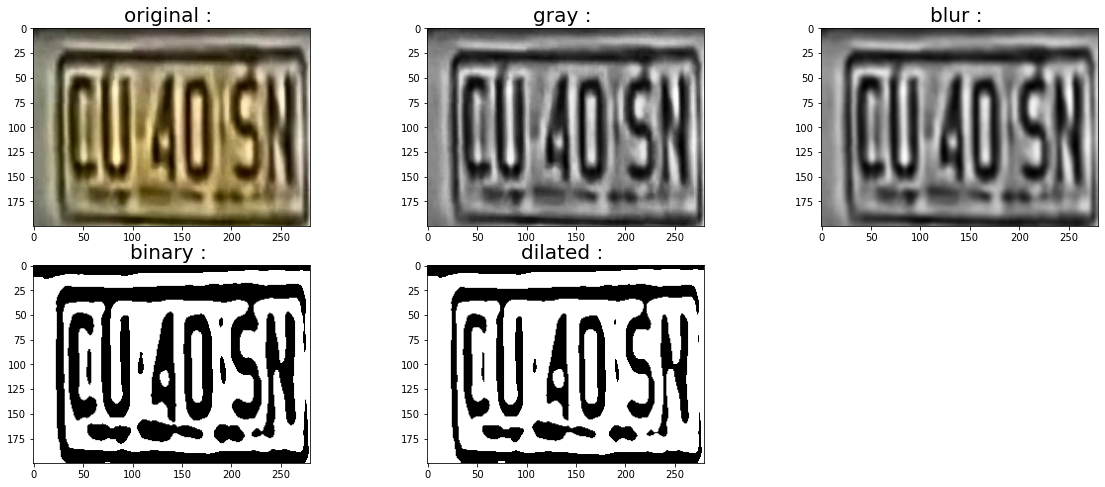

*************************************************************************
Original images : (200, 280, 3)


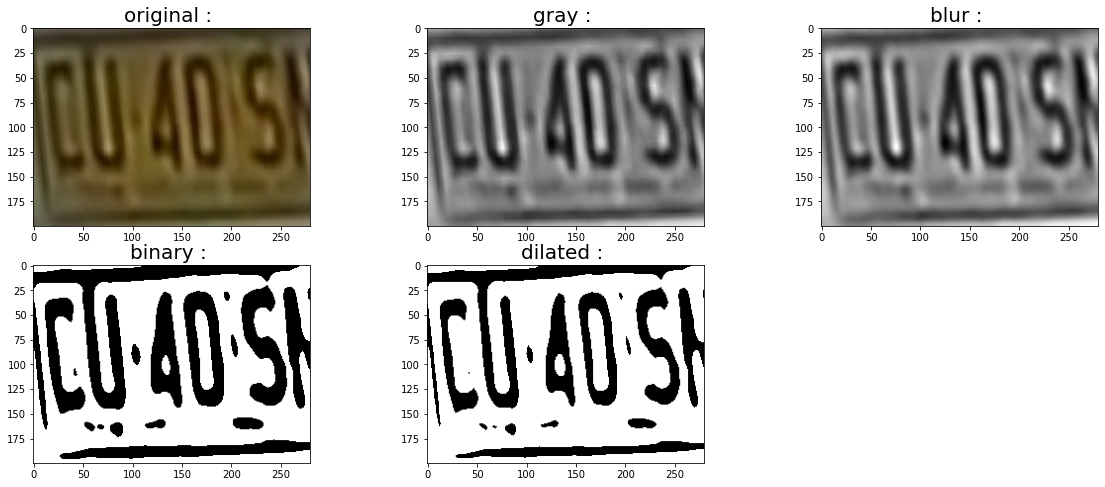

********************************
Enhanced images : (200, 280, 3)


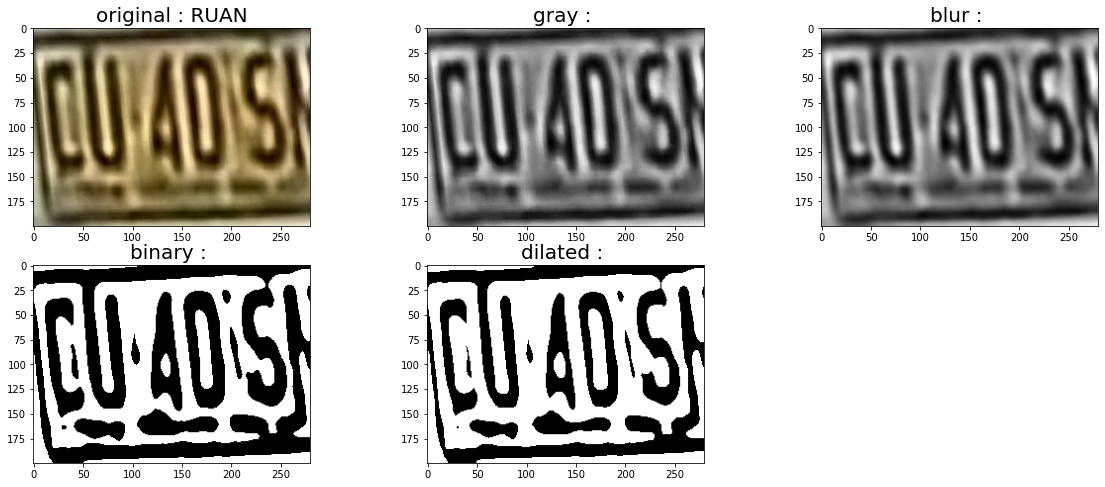

*************************************************************************
Original images : (110, 470, 3)


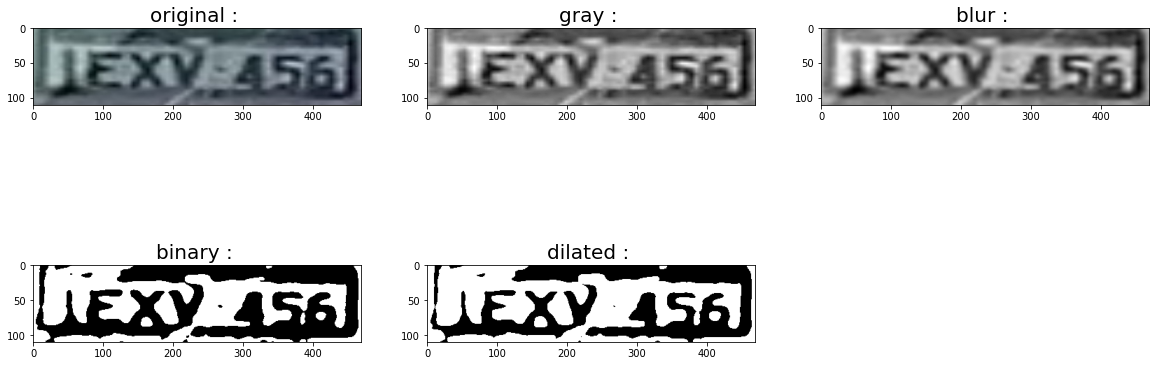

********************************
Enhanced images : (110, 470, 3)


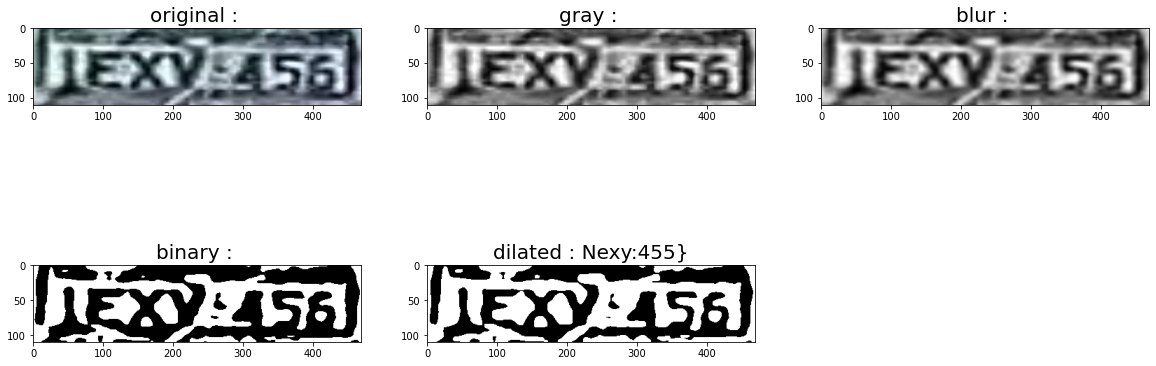

*************************************************************************
Original images : (110, 470, 3)


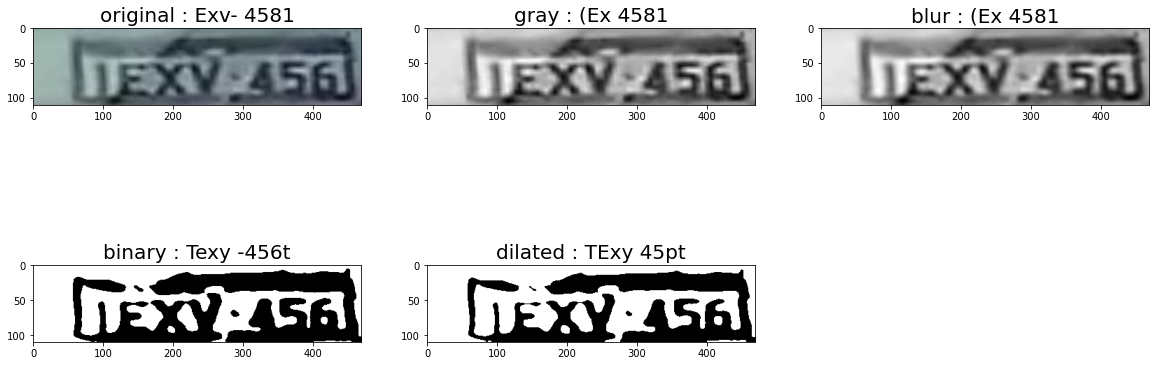

********************************
Enhanced images : (110, 470, 3)


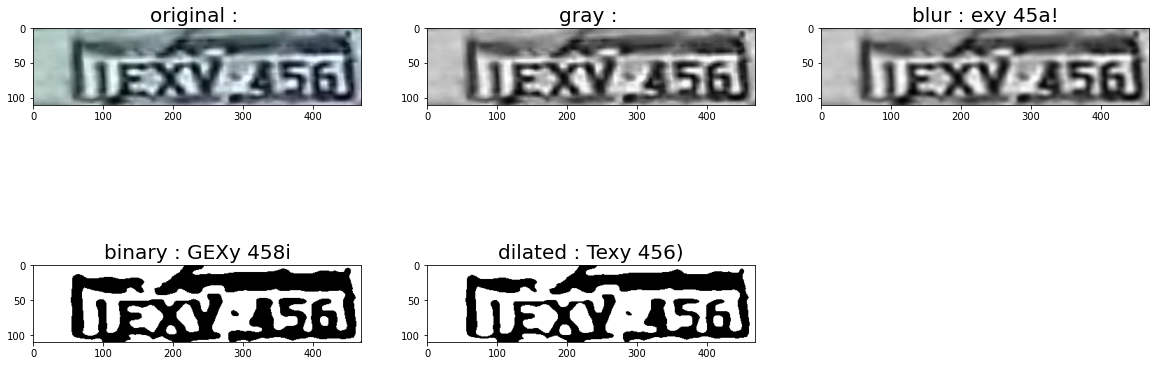

*************************************************************************
Original images : (110, 470, 3)


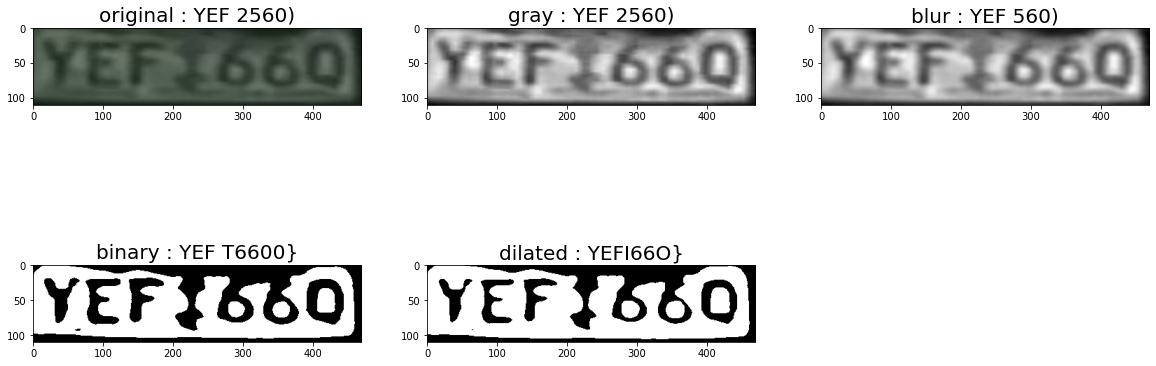

********************************
Enhanced images : (110, 470, 3)


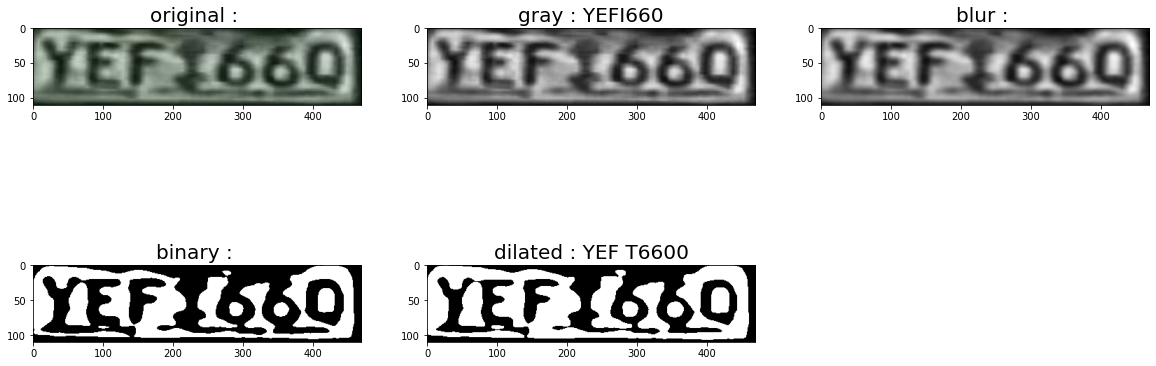

*************************************************************************
Original images : (110, 470, 3)


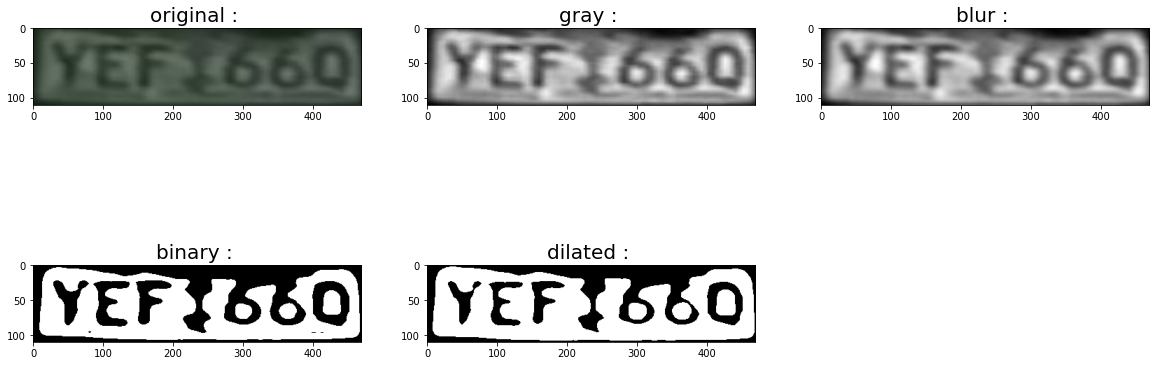

********************************
Enhanced images : (110, 470, 3)


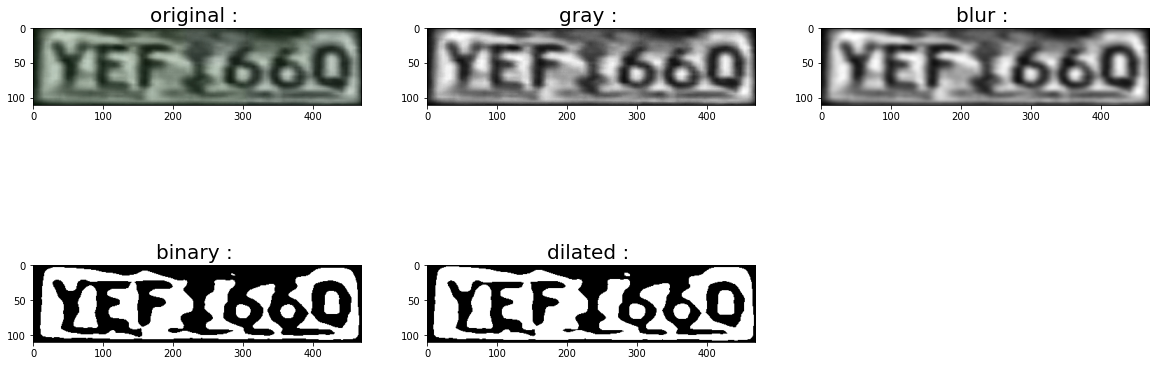

*************************************************************************
Original images : (110, 470, 3)


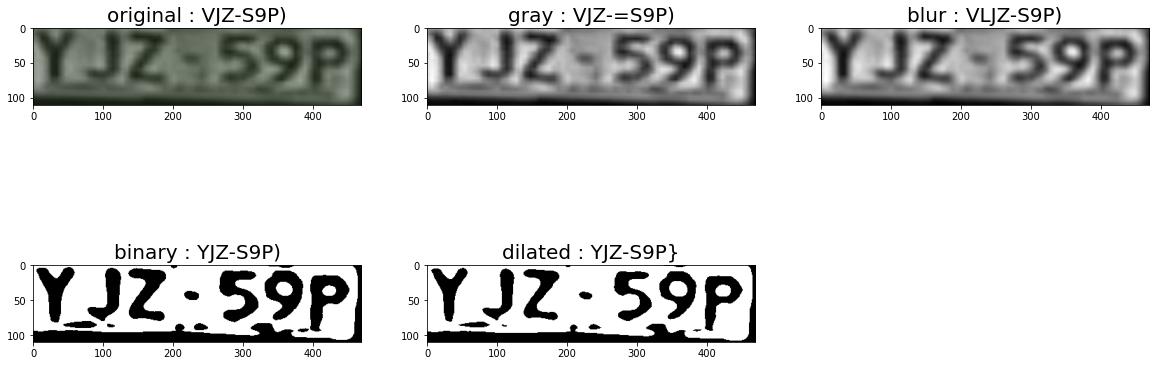

********************************
Enhanced images : (110, 470, 3)


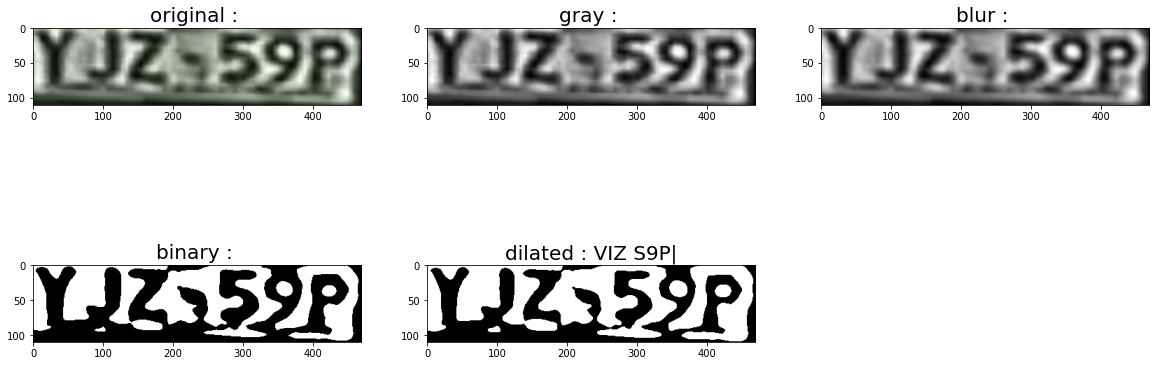

*************************************************************************
Original images : (110, 470, 3)


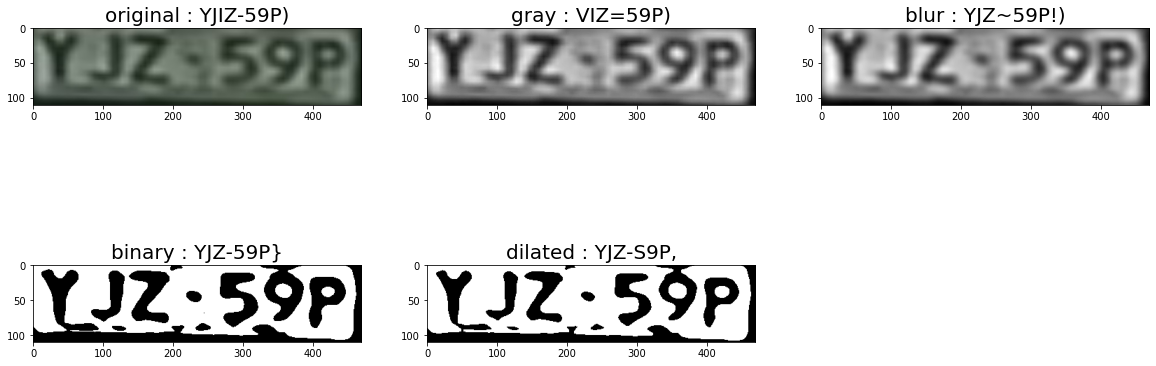

********************************
Enhanced images : (110, 470, 3)


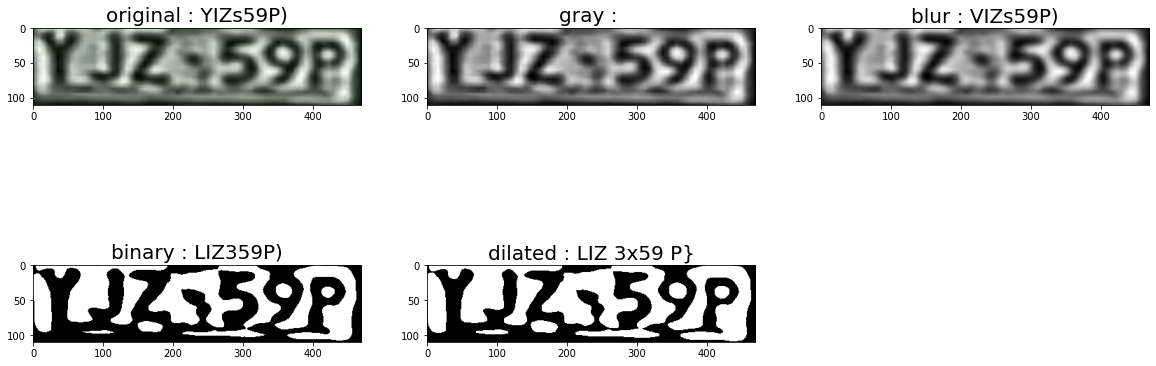

*************************************************************************
Original images : (110, 470, 3)


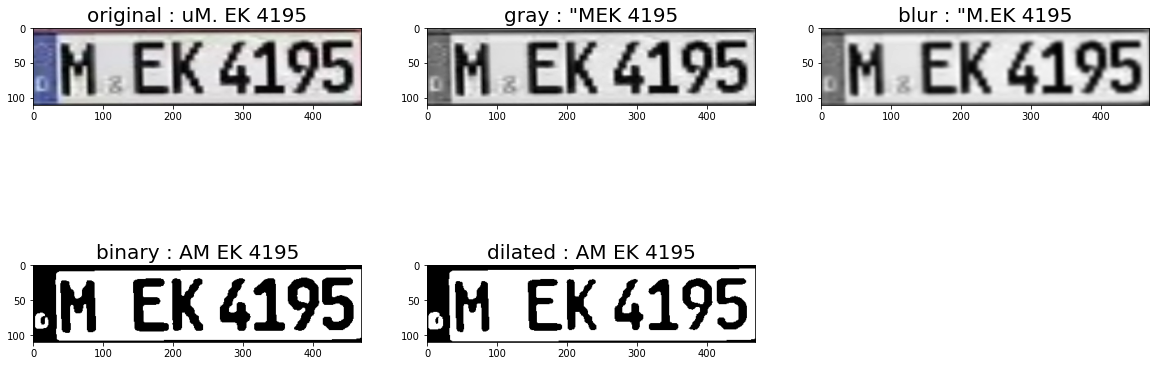

********************************
Enhanced images : (110, 470, 3)


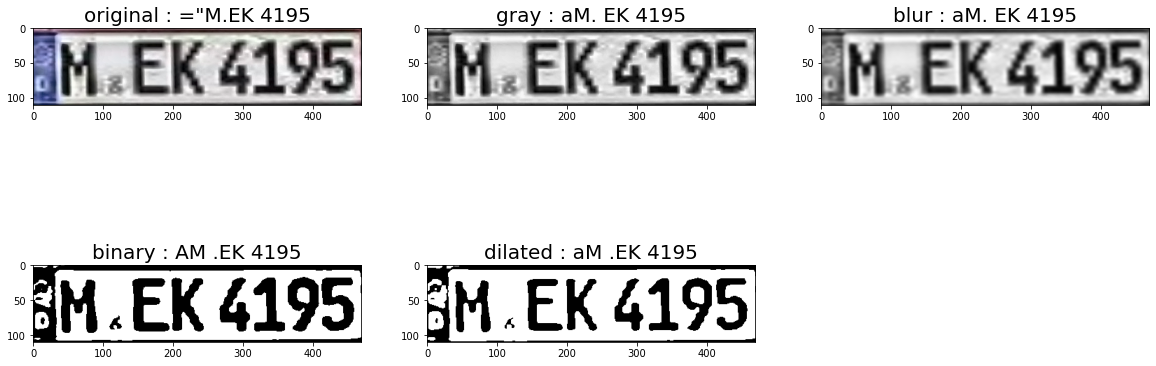

*************************************************************************


In [47]:
for img_cnt, bothimages in enumerate(zip(img_list, enhanced_img_list)):

    
    plate_image, gray, blur, binary, dilate = get_image_formats(bothimages[0])
    allimage_types = [plate_image, gray, blur, binary, dilate]
    allimage_titles = ['original', 'gray', 'blur', 'binary', 'dilated']
    print(f'Original images : {plate_image.shape}')                                                                       
    plt.figure(figsize= (20,8))
    plot_allimages(allimage_types, allimage_titles, string_flag = True)
    
    print('********************************')
          
                                                                           
    plate_image, gray, blur, binary, dilate = get_image_formats(bothimages[1])
    allimage_types = [plate_image, gray, blur, binary, dilate]
    allimage_titles = ['original', 'gray', 'blur', 'binary', 'dilated']
    print(f'Enhanced images : {plate_image.shape}')             
    plt.figure(figsize= (20,8))
    plot_allimages(allimage_types, allimage_titles, string_flag = True)
    
    
    print('*************************************************************************')